In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#load dataset East West Airlines Dataset

In [2]:
df=pd.read_csv('/content/EastWestAirlines_DataSet.csv')
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#EDA(Explotary Data Analysis)

In [4]:
# Drop the ID column as it is not relevant for clustering
df = df.drop('ID', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
df.shape

(3999, 11)

In [7]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [8]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [10]:
#check the award value_counts
df.Award.value_counts()

,count
Award,
0,2518
1,1481


*We have reached 1 for the awarded and 0 for the non-rewarded, Also we can use this dataset in the classification problem

#correlation of features

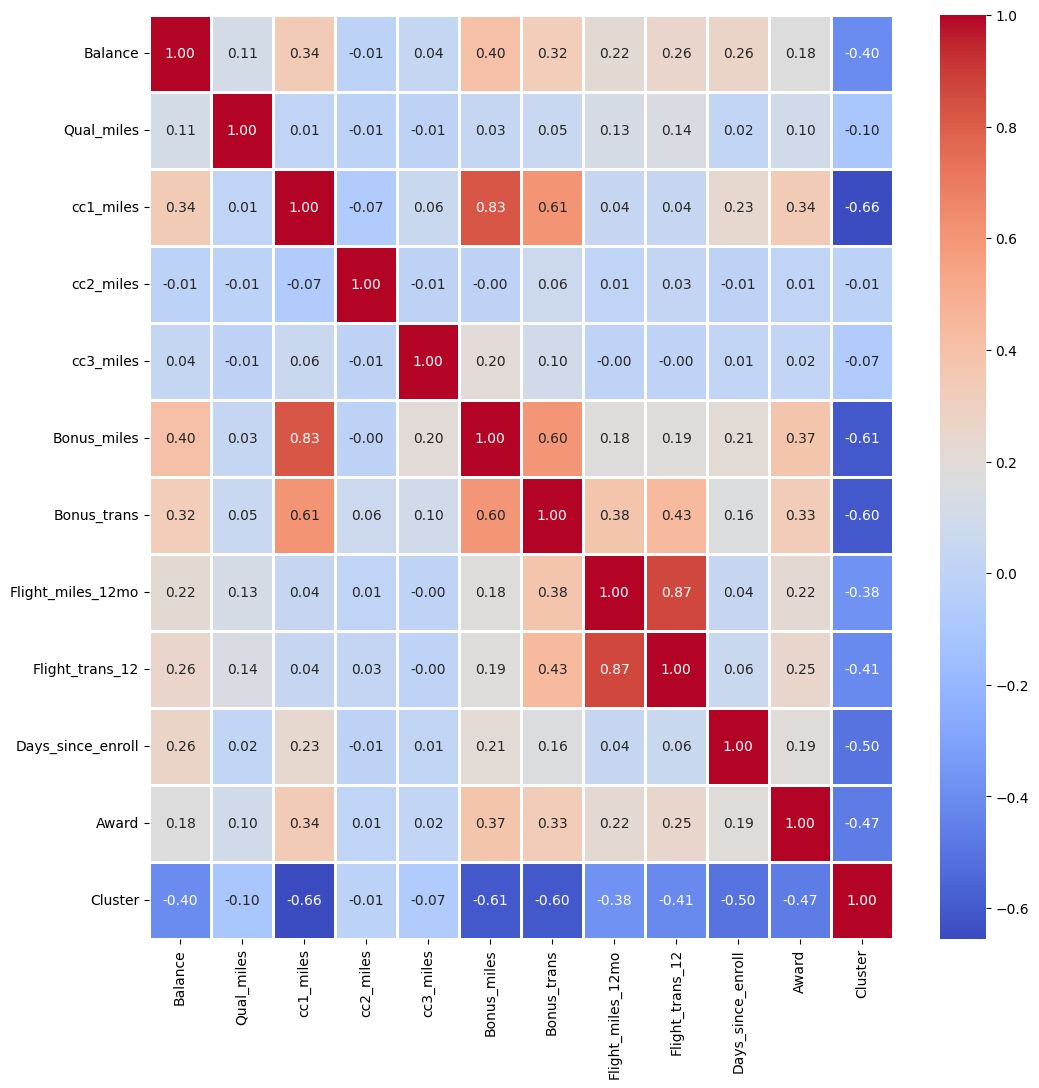

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

#scaled the dataset before k-mean

In [16]:
# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

##K-MEANS

In [35]:
kmeans=KMeans().fit(df_scaled)

In [36]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=3)
    kmeans.fit(df_scaled)
    score.append(kmeans.inertia_)

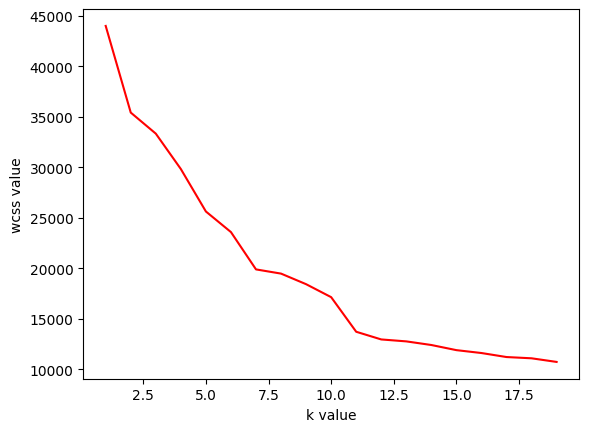

In [37]:
#visualize;

plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value")
plt.show()

In [38]:
# Choose the optimal number of clusters (say 4 from the Elbow method)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [39]:
df['Cluster'].value_counts()

,count
Cluster,
3,1502
2,1236
1,1105
0,156


In [41]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


#save the result in new cluster column

In [42]:
# Save the result with the new cluster column
df.to_csv('EW_clustered.csv', index=False)

In [45]:
# Features (X) and the newly created target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

#spliting dataset in train and test dataset

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9733333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        41
           1       0.96      0.96      0.96       337
           2       0.98      0.97      0.98       380
           3       0.97      0.99      0.98       442

    accuracy                           0.97      1200
   macro avg       0.98      0.95      0.96      1200
weighted avg       0.97      0.97      0.97      1200



#save the model

In [56]:
import joblib
filename='EW_model.pkl'
joblib.dump(rf,filename)
print(f"Model saved as {filename}")

Model saved as EW_model.pkl


In [57]:
#load dataset
model=joblib.load(filename)

#take simple dataset to test the model

In [58]:
# New data example for testing
new_data = pd.DataFrame({
    'Balance': [150000, 50000],
    'Qual_miles': [0, 100],
    'cc1_miles': [1, 1],
    'cc2_miles': [1, 1],
    'cc3_miles': [1, 0],
    'Bonus_miles': [30000, 200],
    'Bonus_trans': [15, 1],
    'Flight_miles_12mo': [1000, 0],
    'Flight_trans_12': [2, 0],
    'Days_since_enroll': [4000, 1000],
    'Award': [1, 0]
})

In [60]:
#scaling dataset
new_data_scaled = scaler.fit_transform(new_data)

In [61]:
#predict cluster using model
predicted_clusters = model.predict(new_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
# Output the predicted clusters
print("Predicted Clusters for new data:", predicted_clusters)

Predicted Clusters for new data: [3 3]


#conclusion
-The output Predicted Clusters for new data: [3 3] means that the Random Forest model has predicted that both instances of the new data belong to Cluster 3.\
-Cluster 3 represents a group of passengers who have similar behavior and characteristics.\
Both new passengers fall into this same group, meaning their features (like balance, miles, transactions, etc.) match closely with the profile of passengers in Cluster 3.